# ***A neural network designed for handwriting recognition uses deep learning to analyze and interpret handwritten text, converting it into digital form accurately and efficiently!!***

Step 1: Importing all necessary libraries for our Project

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from warnings import filterwarnings
filterwarnings(action='ignore')

Step 2: Now we have to load the Dataset into the Notebook

In [ ]:
mnist = fetch_openml('mnist_784')

Step 3: Create array variables x and y. Store in them the data and the targets respectively
 of the mnist As we discussed above

In [ ]:
x, y = mnist['data'], mnist['target']

Step 4: Reshaping the Dataset and plotting the data with MatPlotLib

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
some_digit = x.to_numpy()[36004]
some_digit_image = some_digit.reshape(28, 28)

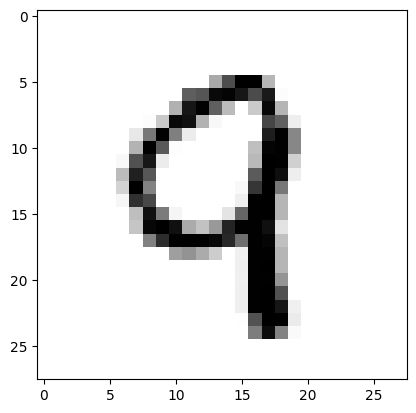

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
#If you want to remove axis plt.axis("off")
plt.show()

In [ ]:
some_digit = x.to_numpy()[36004]
some_digit_image = some_digit.reshape(28, 28)

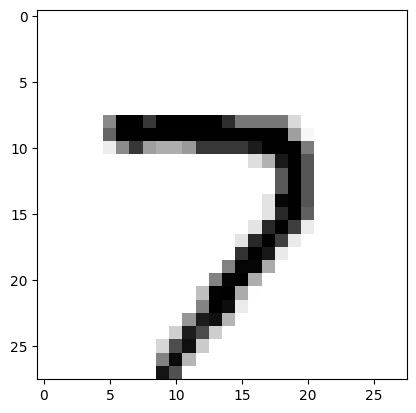

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
#If you want to remove axis plt.axis("off")
plt.show()

Step 5: In mnist Dataset, The first 60000 are training data, and the last 10000 are testing data. Create two array variables x_train and x_test and store in them

In [ ]:
x_train, x_test = x[:60000], x[6000:70000]
y_train, y_test = y[:60000], y[6000:70000]

In [ ]:
#We have to shuffle all the digits so that algorithm understands all random training set
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [ ]:
#To detect wheather a number is two (2) digit number of not
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [ ]:
y_test

6000     6
6001     0
6002     1
6003     1
6004     5
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 64000, dtype: int8

In [ ]:
y_test_2

6000     False
6001     False
6002     False
6003     False
6004     False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 64000, dtype: bool

In [ ]:
y_train

3333     2
12851    6
41298    4
56670    7
58758    3
        ..
13903    1
5510     3
47347    4
31275    9
27236    8
Name: class, Length: 60000, dtype: int8

In [ ]:
y_train_2

3333      True
12851    False
41298    False
56670    False
58758    False
         ...  
13903    False
5510     False
47347    False
31275    False
27236    False
Name: class, Length: 60000, dtype: bool

# **MODEL: LOGISTIC REGRESSION**

In [ ]:
clf = LogisticRegression(tol=0.1)

In [ ]:
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [ ]:
example = clf.predict([some_digit])
print(example)

[False]


Step 6: Cross Validation of LR MODEL which increases the efficiency of the model

In [ ]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean()*100)

97.845
